# Poisson Regression

Poisson regression assumes the response variable Y has a Poisson distribution, and assumes the logarithm of its expected value can be modeled by a linear combination of unknown parameters. A Poisson regression model is sometimes known as a log-linear model, especially when used to model contingency tables.

In [1]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#Create a pandas DataFrame for the counts data set.
df = pd.read_csv('nyc_bb_bicyclist_counts.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [3]:
#Add a few derived regression variables.
ds = df.index.to_series()
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day

In [4]:
#Create the training and testing data sets.
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=166
Testing data set length=48


In [5]:
#Setup the regression expression in patsy notation. We are telling patsy that BB_COUNT is our dependent variable and
# it depends on the regression variables: DAY, DAY_OF_WEEK, MONTH, HIGH_T, LOW_T and PRECIP.
expr = """BB_COUNT ~ DAY  + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"""

In [6]:
#Set up the X and y matrices
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [7]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(
    y_train, X_train, family=sm.families.Poisson()).fit()

In [8]:
poisson_training_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               BB_COUNT   No. Observations:                  166
Model:                            GLM   Df Residuals:                      159
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10383.
Date:                Fri, 08 Jul 2022   Deviance:                       19164.
Time:                        21:39:38   Pearson chi2:                 1.91e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1313      0.013    548.195      0.000       7.106       7.157
DAY            -0.0007      0.000     -4.032      0.000      -0.001      -0.000
DAY_OF_WEEK    -0.0233      0.001    -31.057      0.000      -0.025      -0.022
MONTH           0.0184      0.001     23.359      0.000       0.017       0.020
HIGH_T          0.0231      0.000     67.410      0.000       0.022       0.024
LOW_T          -0.0153      0.000    -41.559      0.000      -0.016      -0.015
PRECIP         -0.7774      0.008   -100.170      0.000      -0.793      -0.762
===============================================================================
"""

In [10]:
#Make some predictions on the test data set.
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
predictions_summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper
Date,,,,
2017-04-01,1963.418551,11.911454,1940.210779,1986.903922
2017-04-04,842.172243,8.001756,826.634215,858.002335
2017-04-05,2708.485187,11.164503,2686.691318,2730.455843
2017-04-07,1896.837223,10.546719,1876.278260,1917.621457
2017-04-11,3200.850710,11.553045,3178.287063,3223.574544
2017-04-16,3147.120753,15.210175,3117.450109,3177.073790
2017-04-17,2724.939929,10.678359,2704.090900,2745.949708
2017-04-21,1574.457140,7.579663,1559.671139,1589.383314
2017-04-27,2396.094279,9.003342,2378.512872,2413.805644


In [11]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = y_test['BB_COUNT']

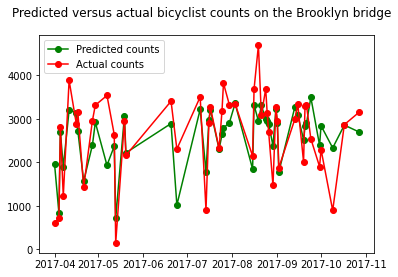

In [12]:
#Mlot the predicted counts versus the actual counts for the test data.
fig = plt.figure()
fig.suptitle('Predicted versus actual bicyclist counts on the Brooklyn bridge')
predicted, = plt.plot(X_test.index, predicted_counts,
                      'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

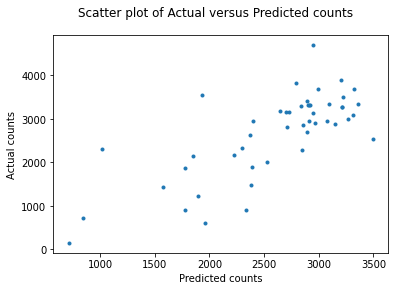

In [13]:
#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()